# Diagnosing Breast Cancer with k-NN algorithm

An example of how we can use the lazy learning k-NN algorithm to diagnose breast cancer.

# Data Collection

[download dataset as csv from here](https://github.com/Code-By-Rob/k-nn_breast_cancer_classification/blob/main/wisc_bc_data.csv)

## Necessary imports

In [171]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [173]:
df = pd.read_csv("wisc_bc_data.csv")

In [175]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [177]:
df.drop('id', axis=1, inplace=True) # id column isn't needed (in fact it would worsen our results)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [193]:
# We see from the info method that there are no missing values (zero non-null values)
# Therefore, we don't need to forward/backward fill, remove or replace any missing values! :)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Normalisation

In [73]:
# Min-Max Normalisation
subset = df.select_dtypes('number').apply(lambda x: x/x.max(), axis=0)

In [67]:
subset # Normalised between 0 and 1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.639986,0.264257,0.651459,0.400240,0.724602,0.803706,0.703140,0.731113,0.795724,0.807779,...,0.704218,0.349818,0.734873,0.474612,0.728661,0.629112,0.568610,0.912027,0.693130,0.573012
1,0.731768,0.452393,0.705040,0.530188,0.518605,0.227678,0.203608,0.348757,0.596053,0.581589,...,0.693396,0.472547,0.632166,0.459803,0.556155,0.176371,0.192971,0.639175,0.414281,0.429012
2,0.700462,0.540988,0.689655,0.481008,0.670747,0.462942,0.462512,0.635686,0.680592,0.615661,...,0.653996,0.515341,0.607086,0.401740,0.648697,0.401229,0.359744,0.835052,0.544290,0.422072
3,0.406261,0.518839,0.411565,0.154378,0.872093,0.821946,0.565604,0.522863,0.854276,1.000000,...,0.413707,0.534921,0.393591,0.133451,0.942498,0.818809,0.548642,0.884880,1.000000,0.833735
4,0.721807,0.365071,0.716711,0.518593,0.613831,0.384482,0.463918,0.518390,0.595066,0.603756,...,0.625416,0.336496,0.605892,0.370240,0.617251,0.193762,0.319489,0.558419,0.356131,0.370024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.766987,0.570010,0.753316,0.591363,0.679315,0.335553,0.571462,0.690358,0.567763,0.577073,...,0.706160,0.532903,0.661226,0.476493,0.633423,0.199716,0.328035,0.761512,0.310334,0.342892
565,0.716115,0.719196,0.696021,0.504198,0.598531,0.299363,0.337395,0.486630,0.576316,0.567837,...,0.657325,0.772103,0.617038,0.406911,0.523810,0.181664,0.256789,0.559450,0.387466,0.319855
566,0.590537,0.714868,0.574536,0.343103,0.517442,0.296178,0.216753,0.263519,0.523026,0.579639,...,0.526637,0.688736,0.504379,0.264222,0.511680,0.292439,0.271805,0.487285,0.334137,0.376867
567,0.732835,0.746690,0.743236,0.505798,0.720930,0.801969,0.823336,0.755467,0.788487,0.720033,...,0.714206,0.795721,0.734873,0.428068,0.741240,0.820510,0.749760,0.910653,0.615697,0.597590


In [195]:
# The describe method allows us to view statistical data of our dataset
subset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.502572,0.491081,0.487899,0.261851,0.589720,0.302087,0.208058,0.243137,0.595927,0.644475,...,0.451420,0.518313,0.426995,0.207001,0.594648,0.240326,0.217403,0.393836,0.436992,0.404558
std,0.125366,0.109497,0.128907,0.140709,0.086072,0.152903,0.186785,0.192857,0.090179,0.072459,...,0.134108,0.124067,0.133768,0.133840,0.102572,0.148711,0.166633,0.225884,0.093202,0.087042
min,0.248346,0.247200,0.232308,0.057377,0.322093,0.056109,0.000000,0.000000,0.348684,0.512726,...,0.220033,0.242632,0.200677,0.043535,0.319721,0.025794,0.000000,0.000000,0.235764,0.265253
25%,0.416222,0.411660,0.398780,0.168053,0.528580,0.187956,0.069260,0.100944,0.532566,0.592159,...,0.360988,0.425515,0.334833,0.121133,0.523810,0.139130,0.091454,0.223127,0.377222,0.344386
50%,0.475631,0.479633,0.457507,0.220352,0.586720,0.268182,0.144189,0.166501,0.589474,0.631568,...,0.415372,0.512919,0.388774,0.161378,0.589847,0.200284,0.181070,0.343402,0.425128,0.385735
75%,0.561366,0.554990,0.552255,0.312955,0.644431,0.377533,0.306232,0.367793,0.643750,0.678571,...,0.521365,0.599919,0.499204,0.254819,0.655885,0.320510,0.305831,0.554639,0.478909,0.443759
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [197]:
df[subset.columns] = subset # add the normalised subset to the df

In [199]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.639986,0.264257,0.651459,0.400240,0.724602,0.803706,0.703140,0.731113,0.795724,...,0.704218,0.349818,0.734873,0.474612,0.728661,0.629112,0.568610,0.912027,0.693130,0.573012
1,M,0.731768,0.452393,0.705040,0.530188,0.518605,0.227678,0.203608,0.348757,0.596053,...,0.693396,0.472547,0.632166,0.459803,0.556155,0.176371,0.192971,0.639175,0.414281,0.429012
2,M,0.700462,0.540988,0.689655,0.481008,0.670747,0.462942,0.462512,0.635686,0.680592,...,0.653996,0.515341,0.607086,0.401740,0.648697,0.401229,0.359744,0.835052,0.544290,0.422072
3,M,0.406261,0.518839,0.411565,0.154378,0.872093,0.821946,0.565604,0.522863,0.854276,...,0.413707,0.534921,0.393591,0.133451,0.942498,0.818809,0.548642,0.884880,1.000000,0.833735
4,M,0.721807,0.365071,0.716711,0.518593,0.613831,0.384482,0.463918,0.518390,0.595066,...,0.625416,0.336496,0.605892,0.370240,0.617251,0.193762,0.319489,0.558419,0.356131,0.370024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,0.766987,0.570010,0.753316,0.591363,0.679315,0.335553,0.571462,0.690358,0.567763,...,0.706160,0.532903,0.661226,0.476493,0.633423,0.199716,0.328035,0.761512,0.310334,0.342892
565,M,0.716115,0.719196,0.696021,0.504198,0.598531,0.299363,0.337395,0.486630,0.576316,...,0.657325,0.772103,0.617038,0.406911,0.523810,0.181664,0.256789,0.559450,0.387466,0.319855
566,M,0.590537,0.714868,0.574536,0.343103,0.517442,0.296178,0.216753,0.263519,0.523026,...,0.526637,0.688736,0.504379,0.264222,0.511680,0.292439,0.271805,0.487285,0.334137,0.376867
567,M,0.732835,0.746690,0.743236,0.505798,0.720930,0.801969,0.823336,0.755467,0.788487,...,0.714206,0.795721,0.734873,0.428068,0.741240,0.820510,0.749760,0.910653,0.615697,0.597590


## Data Preperation

In [212]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We could optionally run the above command rather than that below
# However, for visibility we perform this manually

In [214]:
wbcd_train = df.iloc[:470, 1:] # our X_train (without the diagnosis column)
wbcd_test = df.iloc[470:, 1:] # our X_test (without the diagnosis column)

In [218]:
wbcd_train_labels = df.iloc[:470, 0] # our y_train (only the diagnosis column i.e., our labels)
wbcd_test_labels = df.iloc[470:, 0] # our y_test (only the diagnosis column i.e., our labels)

#### Taking a peak at the dataframes

In [105]:
wbcd_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.639986,0.264257,0.651459,0.400240,0.724602,0.803706,0.703140,0.731113,0.795724,0.807779,...,0.704218,0.349818,0.734873,0.474612,0.728661,0.629112,0.568610,0.912027,0.693130,0.573012
1,0.731768,0.452393,0.705040,0.530188,0.518605,0.227678,0.203608,0.348757,0.596053,0.581589,...,0.693396,0.472547,0.632166,0.459803,0.556155,0.176371,0.192971,0.639175,0.414281,0.429012
2,0.700462,0.540988,0.689655,0.481008,0.670747,0.462942,0.462512,0.635686,0.680592,0.615661,...,0.653996,0.515341,0.607086,0.401740,0.648697,0.401229,0.359744,0.835052,0.544290,0.422072
3,0.406261,0.518839,0.411565,0.154378,0.872093,0.821946,0.565604,0.522863,0.854276,1.000000,...,0.413707,0.534921,0.393591,0.133451,0.942498,0.818809,0.548642,0.884880,1.000000,0.833735
4,0.721807,0.365071,0.716711,0.518593,0.613831,0.384482,0.463918,0.518390,0.595066,0.603756,...,0.625416,0.336496,0.605892,0.370240,0.617251,0.193762,0.319489,0.558419,0.356131,0.370024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,0.471007,0.512475,0.460849,0.217073,0.506977,0.354082,0.236645,0.140805,0.526645,0.660099,...,0.428413,0.514736,0.457803,0.172426,0.539533,0.533648,0.523642,0.466323,0.428593,0.601928
466,0.467449,0.528004,0.456127,0.214674,0.530906,0.315287,0.254217,0.174453,0.513816,0.617816,...,0.410655,0.513928,0.401672,0.161989,0.606918,0.335444,0.359744,0.405842,0.386110,0.393928
467,0.343935,0.460794,0.323926,0.114474,0.508629,0.157151,0.034653,0.028673,0.552632,0.658046,...,0.309378,0.496972,0.283081,0.089375,0.623540,0.118620,0.051190,0.085911,0.460530,0.379518
468,0.626112,0.593941,0.631300,0.392043,0.568482,0.580197,0.500469,0.498012,0.557895,0.756260,...,0.598502,0.582761,0.571656,0.337800,0.542228,0.452268,0.412540,0.685911,0.346641,0.589880


In [107]:
wbcd_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
470,0.343899,0.470723,0.326207,0.115594,0.547491,0.181181,0.069072,0.075249,0.736184,0.658149,...,0.309101,0.517158,0.282166,0.090550,0.554358,0.145747,0.101997,0.225430,0.478156,0.410795
471,0.428317,0.716395,0.407692,0.179888,0.535618,0.173712,0.055459,0.118141,0.609868,0.584770,...,0.377358,0.672790,0.347293,0.133427,0.467655,0.091928,0.044121,0.190619,0.362157,0.319952
472,0.530772,0.380092,0.511671,0.274650,0.495594,0.247510,0.129780,0.160089,0.554934,0.581794,...,0.476693,0.367784,0.445860,0.213117,0.478437,0.263800,0.251677,0.394158,0.404941,0.398699
473,0.436499,0.762984,0.410716,0.186086,0.471175,0.098379,0.000000,0.000000,0.559539,0.611658,...,0.373196,0.768066,0.338694,0.131382,0.423270,0.049272,0.000000,0.000000,0.362911,0.324964
474,0.387051,0.397658,0.373528,0.143503,0.616279,0.309496,0.119845,0.078082,0.612171,0.701663,...,0.331299,0.390593,0.321576,0.101810,0.598383,0.368431,0.268770,0.273746,0.388822,0.520482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.766987,0.570010,0.753316,0.591363,0.679315,0.335553,0.571462,0.690358,0.567763,0.577073,...,0.706160,0.532903,0.661226,0.476493,0.633423,0.199716,0.328035,0.761512,0.310334,0.342892
565,0.716115,0.719196,0.696021,0.504198,0.598531,0.299363,0.337395,0.486630,0.576316,0.567837,...,0.657325,0.772103,0.617038,0.406911,0.523810,0.181664,0.256789,0.559450,0.387466,0.319855
566,0.590537,0.714868,0.574536,0.343103,0.517442,0.296178,0.216753,0.263519,0.523026,0.579639,...,0.526637,0.688736,0.504379,0.264222,0.511680,0.292439,0.271805,0.487285,0.334137,0.376867
567,0.732835,0.746690,0.743236,0.505798,0.720930,0.801969,0.823336,0.755467,0.788487,0.720033,...,0.714206,0.795721,0.734873,0.428068,0.741240,0.820510,0.749760,0.910653,0.615697,0.597590


In [109]:
wbcd_train_labels

0      M
1      M
2      M
3      M
4      M
      ..
465    B
466    B
467    B
468    M
469    B
Name: diagnosis, Length: 470, dtype: object

In [111]:
wbcd_test_labels

470    B
471    B
472    B
473    B
474    B
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 99, dtype: object

# Training a model on the data

In [150]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [225]:
# Typically, for k-NN we sqrt the count of the train set count/length e.g., 21
# Note using an odd number with a two category outcome prevents a tie vote
np.sqrt(469)

21.656407827707714

In [227]:
k = 21  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

In [229]:
# Train the k-NN Classifier
knn.fit(wbcd_train, wbcd_train_labels)

KNeighborsClassifier(n_neighbors=21)

In [231]:
y_pred = knn.predict(wbcd_test)

In [233]:
type(y_pred)

numpy.ndarray

In [235]:
type(wbcd_test_labels)

pandas.core.series.Series

In [237]:
# Convert y_test from pandas Series to numpy array
y_test = wbcd_test_labels.values

## Evaluating

In [240]:
# accuracy_score provides a straightforward way to compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


In [279]:
# For precision and recall, scikit-learn offers precision_score and recall_score respectively
from sklearn.metrics import precision_score, recall_score
# Assuming `predictions` and `y_test` are your predicted and true labels
# and considering 'M' as the positive class (malignant tumors)
precision_M = precision_score(y_test, y_pred, pos_label='M')
precision_B = precision_score(y_test, y_pred, pos_label='B')
recall_M = recall_score(y_test, y_pred, pos_label='M')
recall_B = recall_score(y_test, y_pred, pos_label='B')

In [281]:
# True positive predictions for the class label M (for Malignant)
precision_M

1.0

We can see that for the malignant precision score we achieve 100%. Meaning the model correctly predicted all of the test set.

In [284]:
# True positive predictions for the class label B (for Benign)
precision_B

0.9743589743589743

We can see that for the benign precision score we achieve 0.97.... This means we correctly predicted ~97% of benign tumors. However, this also in-turn means we incorrectly predicted 0.025641025641026 || ~2.5%

In [287]:
recall_M

0.9130434782608695

In [291]:
recall_B

1.0

In [295]:
from sklearn.metrics import f1_score
f1_M = f1_score(y_test, y_pred, pos_label='M')
f1_B = f1_score(y_test, y_pred, pos_label='B')

In [297]:
f1_M

0.9545454545454545

In [299]:
f1_B

0.9870129870129869

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [301]:
conf_mat = confusion_matrix(y_test, y_pred)

In [303]:
conf_mat

array([[76,  0],
       [ 2, 21]])

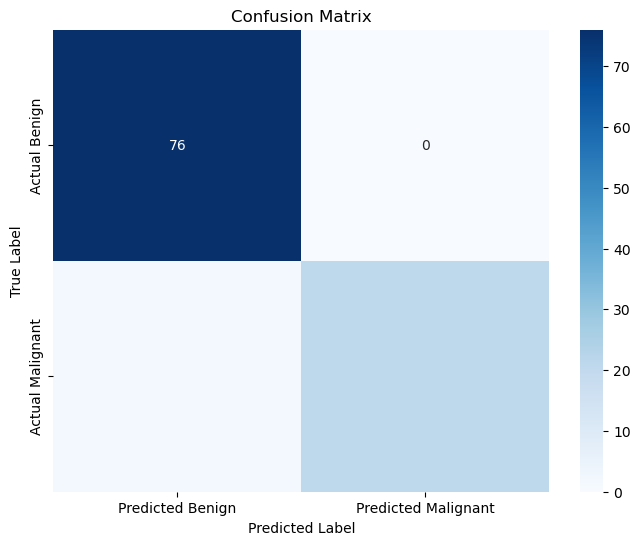

In [324]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Benign', 'Predicted Malignant'], 
            yticklabels=['Actual Benign', 'Actual Malignant'])

# Add heatmap titles and labels
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Show the plot
plt.show()

To visualize the confusion matrix in a human-readable and visually appealing format, you can use the plotting capabilities provided by libraries such as matplotlib and seaborn. By generating a heatmap or a color-coded grid representation of the confusion matrix, you can make the results more intuitive and accessible. 

## Improving the Model

In [375]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 100, 2)), 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(wbcd_train, wbcd_train_labels)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49, 51, 53, 55, 57, 59, ...],
                         'weights': ['uniform', 'distance']})

In [377]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [379]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [381]:
grid_search.best_params_['n_neighbors']

3

In [383]:
k = grid_search.best_params_['n_neighbors']  # Number of neighbors
weights = grid_search.best_params_['weights'] # weights
knn = KNeighborsClassifier(n_neighbors=k, weights=weights)

In [385]:
# Train the k-NN Classifier
knn.fit(wbcd_train, wbcd_train_labels)

KNeighborsClassifier(n_neighbors=3)

In [387]:
y_pred = knn.predict(wbcd_test)

In [389]:
# Convert y_test from pandas Series to numpy array
y_test = wbcd_test_labels.values

### Evaluation

In [392]:
# accuracy_score provides a straightforward way to compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [394]:
# For precision and recall, scikit-learn offers precision_score and recall_score respectively
from sklearn.metrics import precision_score, recall_score
# Assuming `predictions` and `y_test` are your predicted and true labels
# and considering 'M' as the positive class (malignant tumors)
precision_M = precision_score(y_test, y_pred, pos_label='M')
precision_B = precision_score(y_test, y_pred, pos_label='B')
recall_M = recall_score(y_test, y_pred, pos_label='M')
recall_B = recall_score(y_test, y_pred, pos_label='B')

In [396]:
# True positive predictions for the class label M (for Malignant)
precision_M

0.9166666666666666

In [398]:
# True positive predictions for the class label B (for Benign)
precision_B

0.9866666666666667

In [400]:
recall_M

0.9565217391304348

In [402]:
recall_B

0.9736842105263158

In [404]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [406]:
conf_mat = confusion_matrix(y_test, y_pred)

In [408]:
conf_mat

array([[74,  2],
       [ 1, 22]])

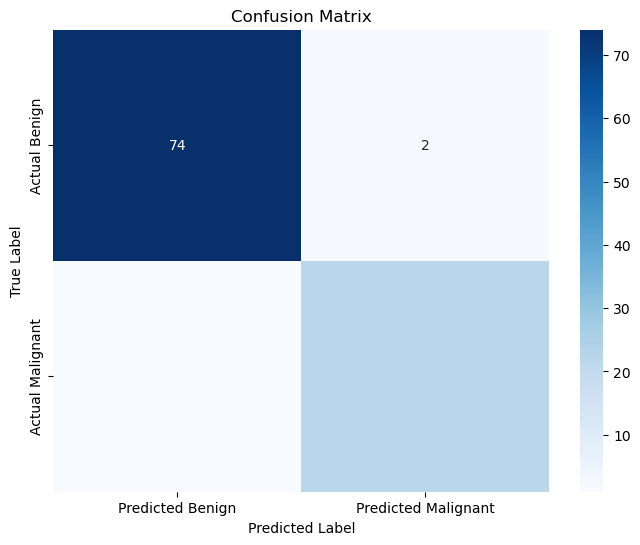

In [410]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Benign', 'Predicted Malignant'], 
            yticklabels=['Actual Benign', 'Actual Malignant'])

# Add heatmap titles and labels
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Show the plot
plt.show()